In [2]:
from mtcnn.src import detect_faces
from PIL import Image
import cv2
import numpy as np
import  matplotlib.pyplot as plt
import random
import math

from utils.alignment import FaceAlignment

In [3]:
def imshow(img):
    """
    jupyter imshow
    """
    plt.figure(dpi=300)
    plt.axis('off')
    img = img[:,:,::-1] 	# transform image to rgb
    plt.imshow(img)
    plt.show()

In [4]:
# alignment
face_align = FaceAlignment()

In [11]:
# Read original image
original_image = Image.open('images/0001_01-0.jpg')
bounding_boxes, landmarks = detect_faces(original_image, thresholds=[0.6, 0.7, 0.85])
image = cv2.cvtColor(np.array(original_image), cv2.COLOR_RGB2BGR)

In [12]:
# Convert type to int32 format
landmark = landmarks.reshape((-1,5,2), order='F').astype(int)[0]
bounding_box = bounding_boxes.astype(int)[0]

In [13]:
warp_image = face_align(image, landmark, bounding_box, image_size=224, mode="vggface")

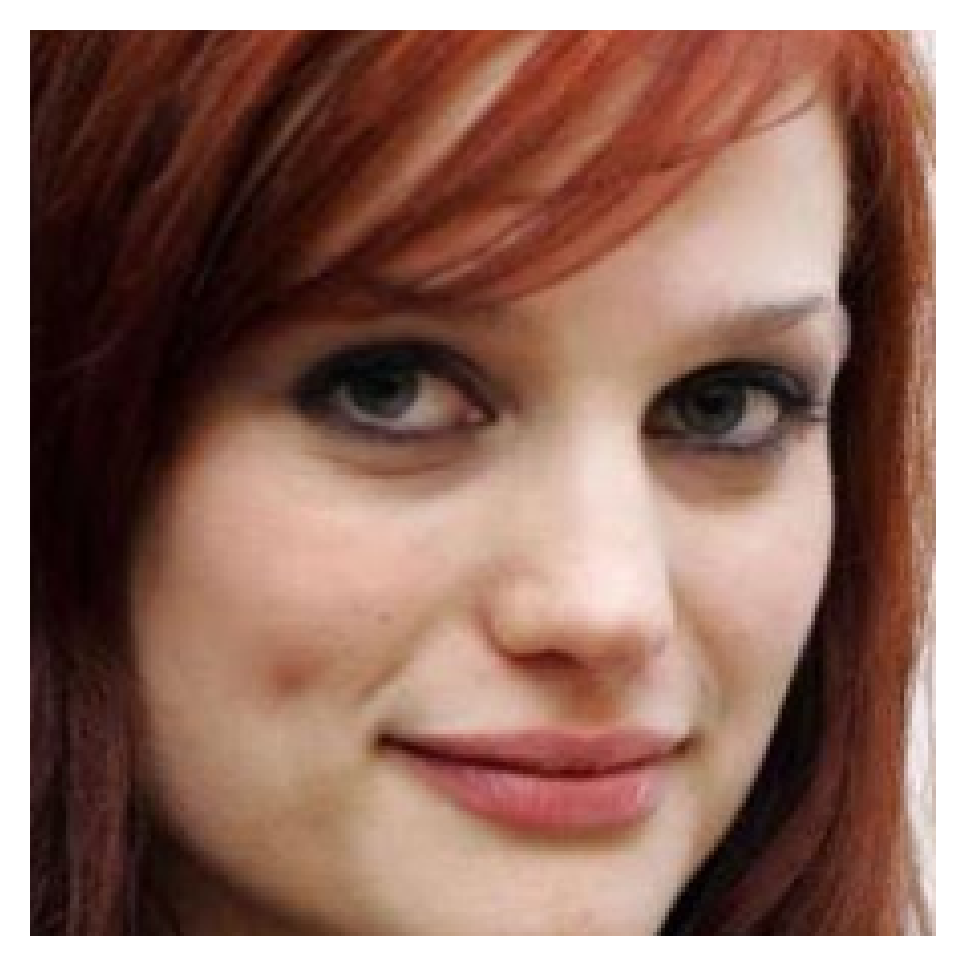

True

In [14]:
imshow(warp_image)
cv2.imwrite("align_vgg/0001_01-0.jpg", warp_image)

In [15]:
warp_image = face_align(image, landmark, bounding_box)

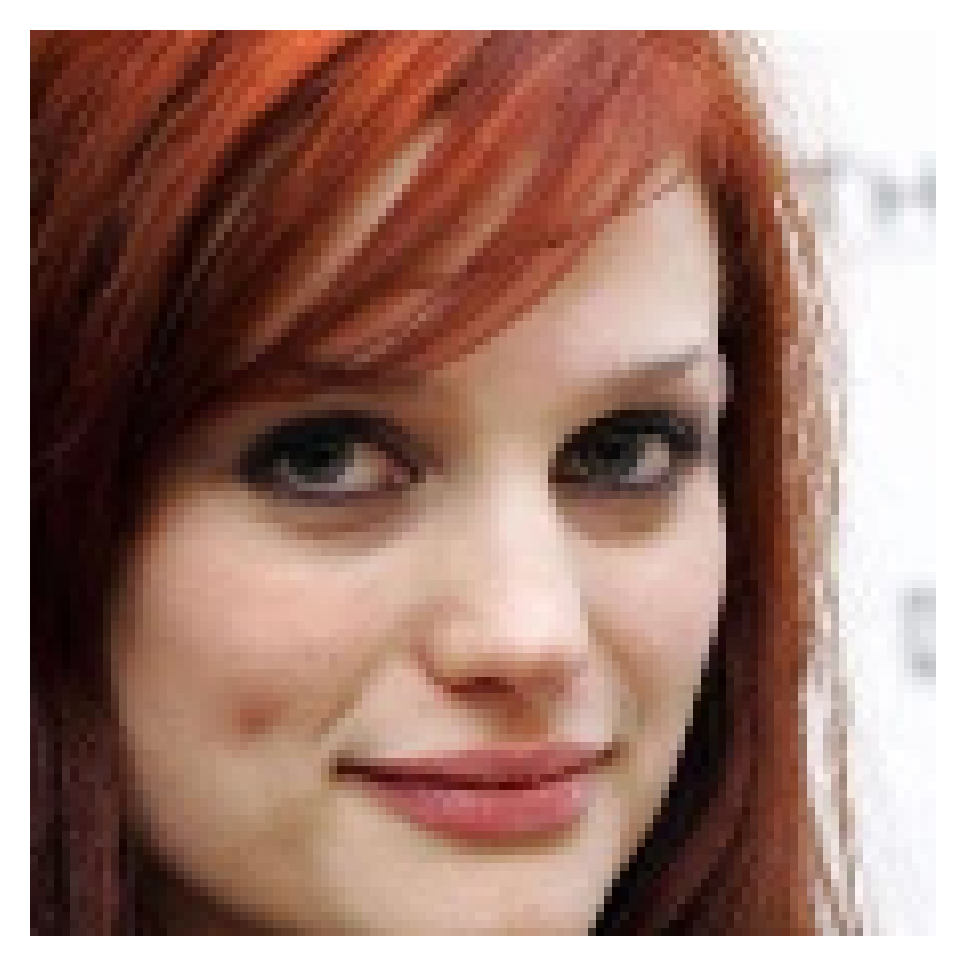

True

In [16]:
imshow(warp_image)
cv2.imwrite("align_arc/0001_01-0.jpg", warp_image)